In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
sns.set_theme(style="white")

## Import protest data

In [2]:
# Import data from Modeling notebook
engine = create_engine('sqlite:///../data/processed/all_data.db')
with engine.begin() as connection:
    df = pd.read_sql('SELECT * FROM all_modeled_data', connection)
    
df['target_categorical'] = ['Revolution' if x == 1 else "No Revolution" for x in df.target]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14558 entries, 0 to 14557
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   region                             14558 non-null  object 
 1   protestnumber                      14558 non-null  int64  
 2   protesterviolence                  14558 non-null  int64  
 3   duration_days                      14558 non-null  int64  
 4   participants                       14558 non-null  int64  
 5   participants_category              14558 non-null  object 
 6   demand_labor-wage-dispute          14558 non-null  int64  
 7   demand_land-farm-issue             14558 non-null  int64  
 8   demand_police-brutality            14558 non-null  int64  
 9   demand_political-behavior/process  14558 non-null  int64  
 10  demand_price-increases/tax-policy  14558 non-null  int64  
 11  demand_removal-of-politician       14558 non-null  int

In [3]:
demands = ['demand_labor-wage-dispute', 'demand_land-farm-issue', 'demand_police-brutality', 'demand_political-behavior/process', 'demand_price-increases/tax-policy', 'demand_removal-of-politician', 'demand_social-restrictions']
binary = demands + ['protesterviolence', 'finittrm', 'military', 'legelec', 'exelec', 'target']

continuous = ['protestnumber', 'duration_days', 'participants', 'alternative_target', 'yrsoffc', 'totalseats', 'startyear', 'liec', 'eiec', 'numvote', 'oppvote', 'gq', 'tensys_strict', 'stabs_strict']
categorical = ['region', 'participants_category', 'system', 'target_categorical']


remainders = df.drop(continuous+categorical+binary, axis=1).columns

if remainders.shape==(0,):
    print("All features successfully bucketed")
else:
    print('Remaining columns to be assigned to various bucket:')
    for col in remainders:
        print(col, '\n', df[col].value_counts(), '\n')

All features successfully bucketed


In [4]:
df.totalseats.value_counts()

120.0    618
166.0    411
300.0    407
577.0    401
500.0    350
        ... 
66.0       1
181.0      1
357.0      1
202.0      1
324.0      1
Name: totalseats, Length: 322, dtype: int64

## Correlation matrix

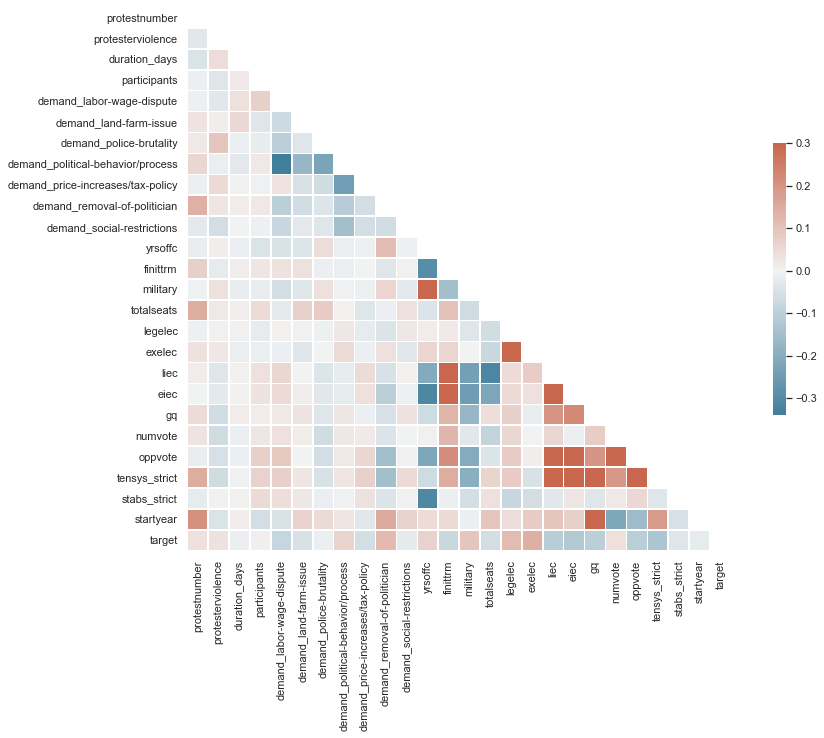

In [5]:
# Compute the correlation matrix
corr = df.drop('alternative_target', axis=1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

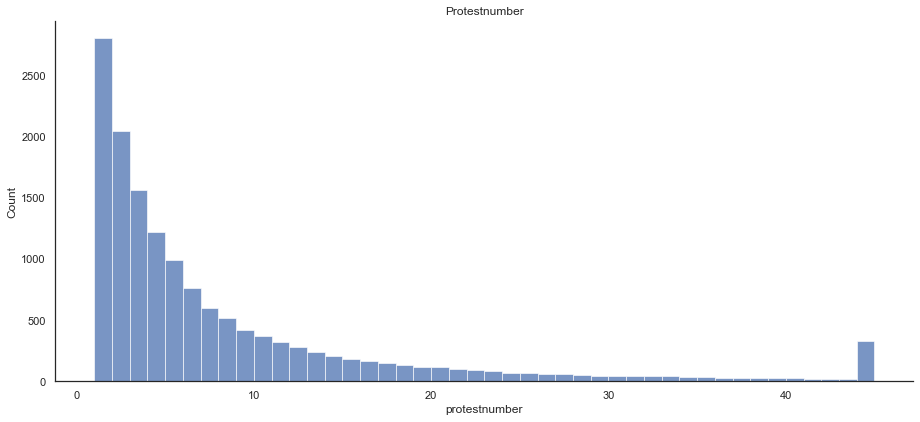

In [6]:
fig = sns.displot(df.protestnumber, bins=(df.protestnumber.max() - df.protestnumber.min()))
fig.fig.set_figwidth(15)
fig.fig.set_figheight(6)
plt.title('Protestnumber');

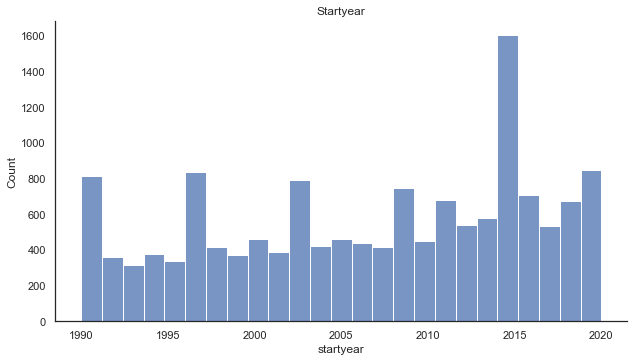

In [7]:
fig = sns.displot(df.startyear)
fig.fig.set_figwidth(10)
fig.fig.set_figheight(5)
plt.title('Startyear');

#### Protest durations

START HERE

Shouldn't the "Duration (days)" value be clean already after being sent through the data cleaning in "Protests" notebook????

In [21]:
df.duration_days.max()

138

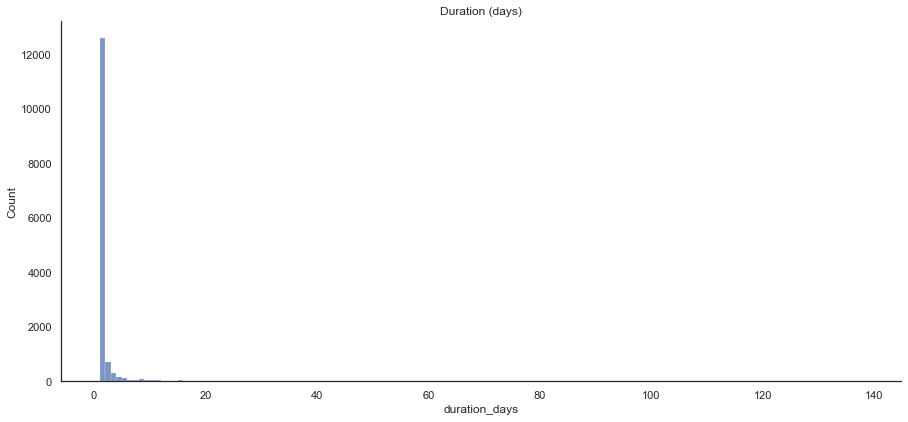

In [8]:
fig = sns.displot(df.duration_days, bins=(df.duration_days.max() - df.duration_days.min()))
fig.fig.set_figwidth(15)
fig.fig.set_figheight(6)
plt.title('Duration (days)');

In [ ]:
stop

Value counts (top 10):
 1     12599
2       700
3       299
4       157
5       107
8        69
6        64
7        50
9        41
15       36
Name: duration_days, dtype: int64


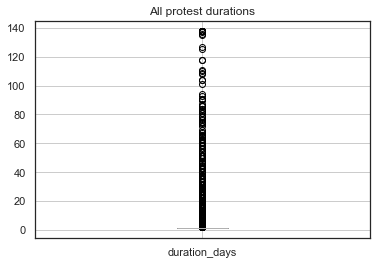

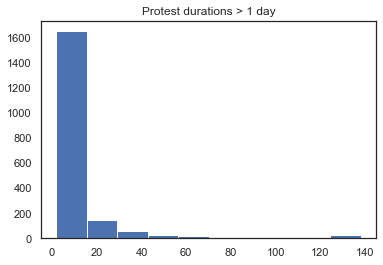

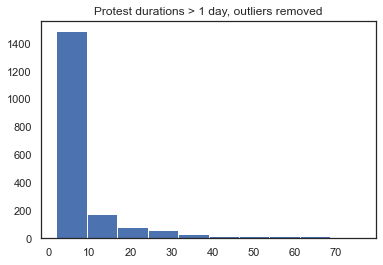

In [9]:
# Duration of protests
print('Value counts (top 10):\n', df.duration_days.value_counts()[:10])
plt.figure()
pd.DataFrame(df.duration_days).boxplot()
plt.title('All protest durations')

# Duration of protests > 1 day
plt.figure()
above_one_day = df.loc[(df.duration_days > 1), 'duration_days']
plt.hist(above_one_day)
plt.title('Protest durations > 1 day')



# Duration of non-outlier protests > 1 day
plt.figure()
above_one_day = df.loc[(df.duration_days > 1), 'duration_days']

plt.hist(above_one_day.loc[above_one_day < above_one_day.mean()+3*above_one_day.std()])
plt.title('Protest durations > 1 day, outliers removed');

#### Participant counts

In [10]:
df.participants.mean() + 3*df.participants.std()

143254.7553429697

In [11]:
df.loc[df.participants > (df.participants.mean() + 3*df.participants.std())].shape

(288, 31)

Value counts (top 20):
 50        3095
100       2496
1000      2199
10000     1033
200        426
2000       379
549        338
500        312
300        301
5000       288
3000       252
3499       214
7500       203
20000      186
100000     180
150        142
357183     140
400        134
4000       132
74         111
Name: participants, dtype: int64


Text(0.5, 1.0, 'Protest durations > 1 day')

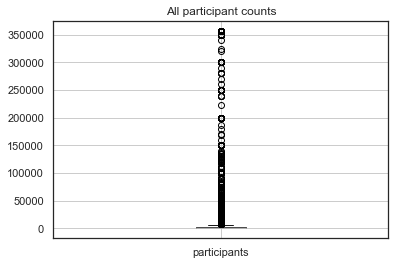

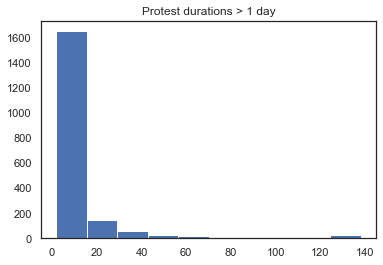

In [12]:
# Participant count
print('Value counts (top 20):\n', df.participants.value_counts()[:20])
plt.figure()
pd.DataFrame(df.participants).boxplot()
plt.title('All participant counts')

# Duration of protests > 1 day
plt.figure()
above_one_day = df.loc[(df.duration_days > 1), 'duration_days']
plt.hist(above_one_day)
plt.title('Protest durations > 1 day')



# # Duration of non-outlier protests > 1 day
# plt.figure()
# above_one_day = df.loc[(df.duration_days > 1), 'duration_days']

# plt.hist(above_one_day.loc[above_one_day < above_one_day.mean()+3*above_one_day.std()])
# plt.title('Protest durations > 1 day, outliers removed');

In [13]:
df.participants_category.value_counts()

100-999      4557
50-99        3393
10000+       2427
1000-1999    2363
2000-4999    1071
5000-9999     747
Name: participants_category, dtype: int64

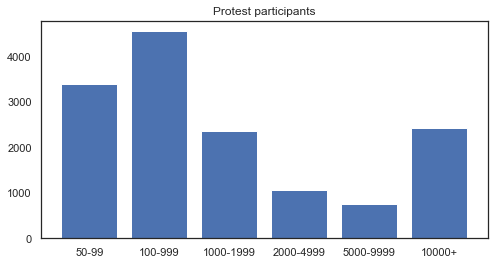

In [14]:
categories = ['50-99', '100-999', '1000-1999', '2000-4999', '5000-9999', '10000+']
participants = []

lookup = dict(df.participants_category.value_counts())
for category in categories:
    participants.append(lookup[category])

plt.figure(figsize=(8, 4))
plt.title('Protest participants')
plt.bar(categories, participants);

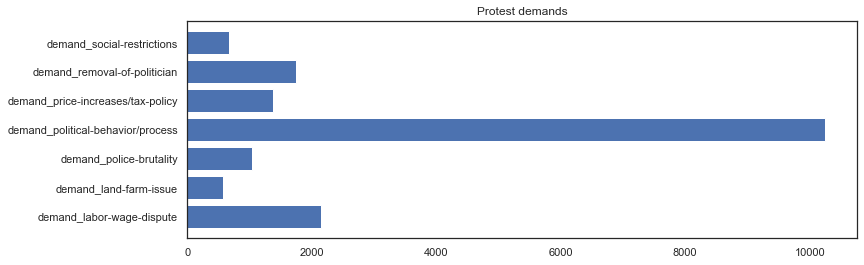

In [15]:


plt.figure(figsize=(12, 4))
plt.barh(df[demands].sum().index, df[demands].sum().values)
plt.title('Protest demands');

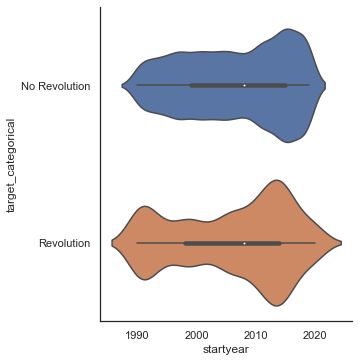

In [16]:
sns.catplot(x='startyear', y='target_categorical',kind="violin", data=df)

In [17]:
df.protestnumber.max()

df.loc[df.protestnumber==143]

,region,protestnumber,protesterviolence,duration_days,participants,participants_category,demand_labor-wage-dispute,demand_land-farm-issue,demand_police-brutality,demand_political-behavior/process,demand_price-increases/tax-policy,demand_removal-of-politician,demand_social-restrictions,system,yrsoffc,finittrm,military,totalseats,legelec,exelec,liec,eiec,gq,numvote,oppvote,tensys_strict,stabs_strict,startyear,target,alternative_target,target_categorical


In [18]:
sns.pairplot(df)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001D55CCF3CA0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
sns.catplot(y='military', x='protesterviolence',kind="violin", hue='target_categorical', data=df)

#plt.scatter(data=df, x='startyear', y='participants')

In [ ]:
plt.rcParams['figure.figsize'] = 12,10
sns.catplot(x=demands[0], y="startyear", data=df, kind='swarm')

In [ ]:
# figure size in inches


In [ ]:
plt.scatter(df[demands[0]], df['alternative_target'])

In [ ]:
# Compute the correlation matrix
corr = df[demands+['target']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});